# Outlier Detection using Z score method

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement_dataset.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

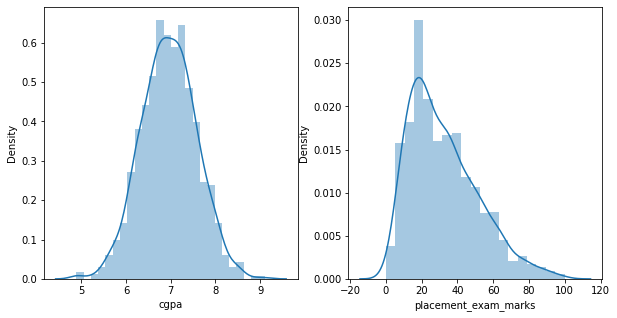

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [45]:
print('Mean value of CGPA {}'.format(df['cgpa'].mean()))
print('Min value of CGPA {}'.format(df['cgpa'].min()))
print('Max value of CGPA {}'.format(df['cgpa'].max()))
print('Standard deviation value of CGPA {}'.format(round(df['cgpa'].std(),2)))

Mean value of CGPA 6.96147
Min value of CGPA 5.11
Max value of CGPA 8.8
Standard deviation value of CGPA 0.61


In [48]:
# the boundary values are:
print('Highest value of cgpa', round(df['cgpa'].mean()+3*df['cgpa'].std(),3))
print('Lowest value of cgpa', round(df['cgpa'].mean()-3*df['cgpa'].std(),3))

Highest value of cgpa 8.799
Lowest value of cgpa 5.123


In [21]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
## there are 5 datapoints which are outliers

In [49]:
df['cgpa_with_zscore'] = (df['cgpa']-df['cgpa'].mean())/(df['cgpa'].std())

df.head()

,cgpa,placement_exam_marks,placed,cgpa_with_zscore
0,7.19,26.0,1,0.373009
1,7.46,38.0,1,0.813705
2,7.54,40.0,1,0.944282
3,6.42,8.0,1,-0.883792
4,7.23,17.0,0,0.438297


In [30]:
df[(df['cgpa_with_zscore']<-3)|(df['cgpa_with_zscore']>3)]

,cgpa,placement_exam_marks,placed,cgpa_with_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# Outlier Treatment

# Trimming

In [23]:
df_new = df[(df['cgpa']>5.11) & (df['cgpa']<8.80)]

In [51]:
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Capping

In [31]:
upper_limit = 8.8
lower_limit = 5.11

df['cgpa'] = np.where(df['cgpa']>upper_limit, upper_limit , df['cgpa']) 
df['cgpa'] = np.where(df['cgpa']<lower_limit , lower_limit , df['cgpa'])

In [40]:
df['cgpa'].min()

5.11

In [41]:
df['cgpa'].max()

8.8